## Welcome to my Tidy Data Project! In this project, I will be working with a dataset on the 2008 Olympic Medalists. The data is currently messy and throughout this Jupyter Notebook, I will be cleaning and tidying the data so it can be used and visualized!

In [293]:
# Let's get started!
import pandas as pd

# Loading the dataset
df = pd.read_csv("/content/drive/MyDrive/olympics_08_medalists.csv")

# First look at the data!
print("Olympic Medalists 2008 Dataframe")
print(df.head())

Olympic Medalists 2008 Dataframe
       medalist_name male_archery female_archery male_athletics  \
0    Aaron Armstrong          NaN            NaN           gold   
1      Aaron Peirsol          NaN            NaN            NaN   
2   Abdullo Tangriev          NaN            NaN            NaN   
3  Abeer Abdelrahman          NaN            NaN            NaN   
4            Abhinav          NaN            NaN            NaN   

  female_athletics male_badminton female_badminton male_baseball  \
0              NaN            NaN              NaN           NaN   
1              NaN            NaN              NaN           NaN   
2              NaN            NaN              NaN           NaN   
3              NaN            NaN              NaN           NaN   
4              NaN            NaN              NaN           NaN   

  male_basketball female_basketball  ... female_beach volleyball  \
0             NaN               NaN  ...                     NaN   
1             NaN  

In [294]:
# In tidy data, each variable forms a column, each observation forms a row, and each type of observational unit forms a table
# Let's melt the data to make sure each observation forms a row and each variable is in its own column
# First, I have to identify the columns that represent medals
medal_columns = df.columns[1:]  # Skipping the 'medalist_name' column by doing [1:]

# Melting the dataframe to the long format
df_melted = pd.melt(df, id_vars=['medalist_name'], value_vars=medal_columns,
                    var_name='Gender_Sport', value_name='Medal')

In [295]:
# The medalist_name column can have a tidier column name so I will rename it to "Athlete"
df_melted = df_melted.rename(columns={'medalist_name': 'Athlete'})

In [296]:
# Splitting the Gender_Sport data into separate columns for sport and gender because it is horrendous combined
df_melted[['Gender', 'Sport']] = df_melted['Gender_Sport'].str.split('_', expand=True)

In [297]:
# Cleaning the medal column by removing any empty values
df_melted = df_melted.dropna(subset=['Medal'])  # Removing rows with no medals

# Cleaning up strings with unwanted spaces/information
#df_melted.loc[:, 'Gender'] = df_melted['Gender'].str.replace('male', 'Men') Doing the modification of the Male and Female strings sequentially wasn't working out because it would take the "male" part of out both the Male and Female strings and convert it to "Men" so I needed to do them both at the same time.
#df_melted.loc[:, 'Gender'] = df_melted['Gender'].str.replace('female', 'Women')
df_melted.loc[:, 'Gender'] = df_melted['Gender'].str.replace(r'^male$', 'Men', regex=True).str.replace(r'^female$', 'Women', regex=True) #sources of inspiration for this code: https://stackoverflow.com/questions/22588316/pandas-applying-regex-to-replace-values and https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html
df_melted.loc[:, 'Sport'] = df_melted['Sport'].str.replace('-', ' ').str.title()  # Removing hyphens and title case

# Getting rid of the original combined column
df_melted = df_melted.drop(columns=['Gender_Sport'])

In [298]:
# Inspecting the cleaned data
print("\nCleaned (Tidy) Olympic Medalists DataFrame:")
print(df_melted.head())


Cleaned (Tidy) Olympic Medalists DataFrame:
            Athlete   Medal Gender    Sport
177    Bair Badënov  bronze    Men  Archery
676   Ilario Di Buò  silver    Men  Archery
682    Im Dong-hyun    gold    Men  Archery
760       Jiang Lin  bronze    Men  Archery
920  Lee Chang-hwan    gold    Men  Archery


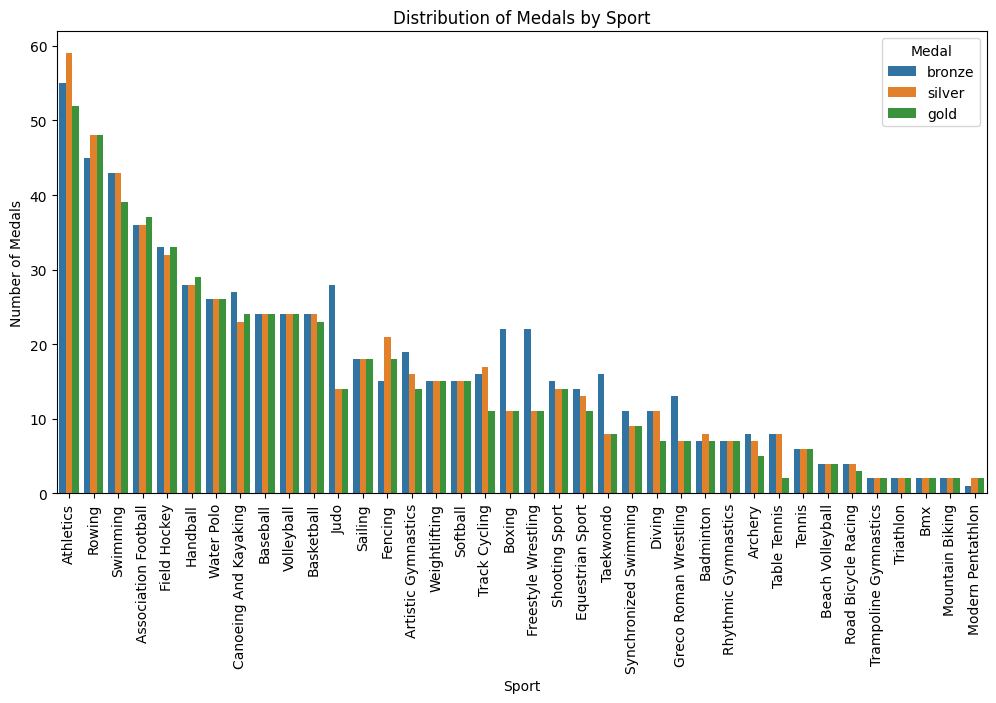

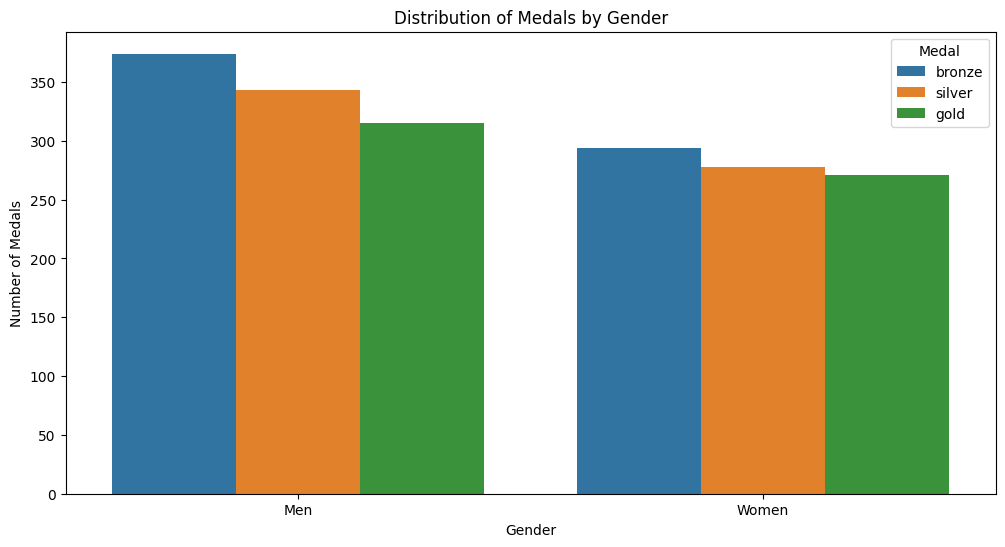


Pivot Table (The Number of Medals by Sport and Gender):
Gender                  Men  Women
Sport                             
Archery                11.0    9.0
Artistic Gymnastics    29.0   20.0
Association Football   55.0   54.0
Athletics              85.0   81.0
Badminton              12.0   10.0
Baseball               72.0    NaN
Basketball             35.0   36.0
Beach Volleyball        6.0    6.0
Bmx                     3.0    3.0
Boxing                 44.0    NaN
Canoeing And Kayaking  53.0   21.0
Diving                 16.0   13.0
Equestrian Sport       18.0   20.0
Fencing                28.0   26.0
Field Hockey           50.0   48.0
Freestyle Wrestling    28.0   16.0
Greco Roman Wrestling  27.0    NaN
Handball               43.0   42.0
Judo                   28.0   28.0
Modern Pentathlon       3.0    2.0
Mountain Biking         3.0    3.0
Rhythmic Gymnastics     NaN   21.0
Road Bicycle Racing     5.0    6.0
Rowing                 83.0   58.0
Sailing                33.0   21.

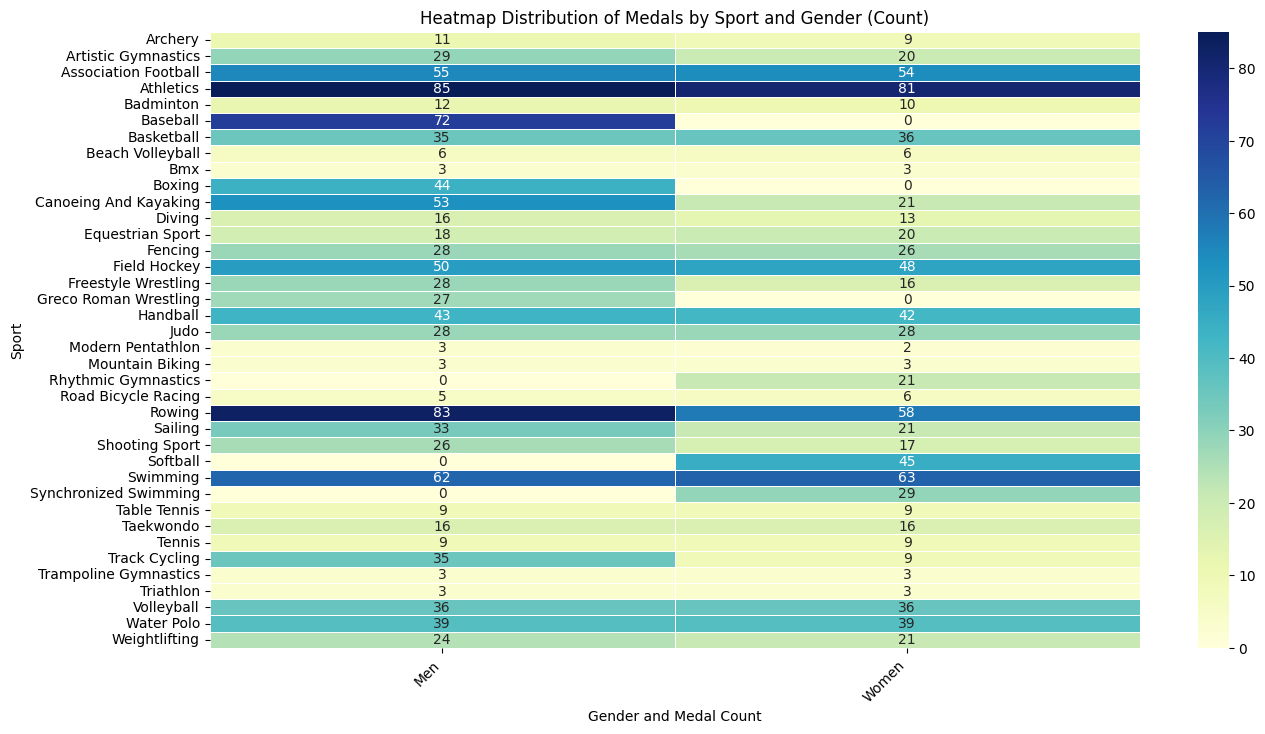

In [299]:
# Starting some of the Exploratory Data Analysis and Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of medals by sport. This aims to provide insight on which sports produce the most medals.
plt.figure(figsize=(12, 6))
sns.countplot(data=df_melted, x='Sport', hue='Medal', order=df_melted['Sport'].value_counts().index)
plt.title('Distribution of Medals by Sport')
plt.xlabel('Sport')
plt.ylabel('Number of Medals')
plt.xticks(rotation=90)
plt.show()

# Plotting the distribution of medals by gender. This visualization aims to go deeper into the medal story by splitting the distribution of medals by gender.
plt.figure(figsize=(12, 6))
sns.countplot(data=df_melted, x='Gender', hue='Medal')
plt.title('Distribution of Medals by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Medals')
plt.show()

# Creating a pivot table for medal counts by sport and gender. This pivot table aggregates the number of medals won by gender in each sport.
pivot_table_medals = pd.pivot_table(df_melted, values='Medal',
                                    index='Sport', columns=['Gender'], aggfunc='count')

print("\nPivot Table (The Number of Medals by Sport and Gender):")
print(pivot_table_medals)

# Reshaping the pivot table for a heatmap visualization
pivot_table_medals = pivot_table_medals.stack(level=['Gender']).reset_index()

# Renaming the '0' column to 'Medal' to represent medal counts
pivot_table_medals = pivot_table_medals.rename(columns={0: 'Medal'}) # Renaming the column for clarity

# Plotting the heatmap
plt.figure(figsize=(15, 8))
# Unstacking the pivot table to have Gender and Medal as columns for the heatmap
heatmap_data = pivot_table_medals.pivot_table(index='Sport', columns=['Gender'], values='Medal', fill_value=0)
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", linewidths=.5)
plt.title('Heatmap Distribution of Medals by Sport and Gender (Count)')
plt.xlabel('Gender and Medal Count')
plt.ylabel('Sport')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability (which can be obscured by the large number of sports)
plt.show()

## The output of these graphs is pretty interesting because it shows that men receive more medals overall than women. This could be due to more events available for men at the 2008 Olympics. Is that equitable? Maybe not. It was also interesting to see the distribution of medals by sport because it showed which sports have more events or opportunities to achieve them. The heatmap helps to visualize the pivot table's insights and directly compares the number of medals won by gender and sport.


In [300]:
# Block of code double-checking all of the data to make sure that my df is tidy and I didn't miss anything.
# Double-checking the columns of the df
print(df_melted.columns)

# Checking the number of rows and columns to verify each observation is in its own row
print(df_melted.shape)

# Checking to see if there are any missing values in the Medal column
print(df_melted['Medal'].isna().sum())

# Also checking for missing values across the entire dataset
print(df_melted.isna().sum())

# Looking at the first few rows to confirm the structure
print(df_melted.head())

# Then looking at the last few rows
print(df_melted.tail())

Index(['Athlete', 'Medal', 'Gender', 'Sport'], dtype='object')
(1875, 4)
0
Athlete    0
Medal      0
Gender     0
Sport      0
dtype: int64
            Athlete   Medal Gender    Sport
177    Bair Badënov  bronze    Men  Archery
676   Ilario Di Buò  silver    Men  Archery
682    Im Dong-hyun    gold    Men  Archery
760       Jiang Lin  bronze    Men  Archery
920  Lee Chang-hwan    gold    Men  Archery
                    Athlete   Medal Gender                  Sport
130932        Steeve Guénot    gold    Men  Greco Roman Wrestling
131159  Yannick Szczepaniak  bronze    Men  Greco Roman Wrestling
131162       Yavor Yanakiev  bronze    Men  Greco Roman Wrestling
131200      Yury Patrikeyev  bronze    Men  Greco Roman Wrestling
131234         Zoltán Fodor  silver    Men  Greco Roman Wrestling


In [301]:
# Trying some regression for fun on the newly cleaned data! (Disclaimer: This is to demonstrate that regression is possible through Tidy data. The outcomes of this regression is not particularly useful or meainingful.)
# Looked back on class work for this section as well as the following sources online: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html and https://pandas.pydata.org/pandas-docs/version/2.2.0/reference/general_functions.html
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

# Loading and cleaning data for the regression
df_melted['Medal'] = df_melted['Medal'].str.strip().str.capitalize()  # Standardize text

# Creating the target variable
medal_mapping = {'Gold': 1, 'Silver': 2, 'Bronze': 3}
df_melted['Medal_Type'] = df_melted['Medal'].map(medal_mapping).fillna(0).astype(int)  # 0 = No Medal

# Printing class distribution
print(df_melted['Medal_Type'].value_counts())

# Encoding categorical features
X = pd.get_dummies(df_melted[['Gender', 'Sport']], drop_first=True)
y = df_melted['Medal_Type']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

# Training the regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating model performance
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

# Displaying how the other variables affect the outcome (if at all since this is a very limited dataset), but a good exercise regardless
# Getting feature names
feature_names = X.columns

# Getting model coefficients
coefficients = model.coef_

# Creating a df for viewing
coef_df = pd.DataFrame(coefficients.T, index=feature_names, columns=['Gold (1)', 'Silver (2)', 'Bronze (3)'])

print("Regression Coefficients:")
print(coef_df)
# I mainly did this exercise to prove that since the data is now tidy, regressions would be possible. The output of this exact regression is very ugly and not very impactful because you can't really tell a story about medals here with a logistic regression. If we had variables that affected the likelihood of attaining a gold, silver, or bronze medal, logistic regression would be very useful and important.

Medal_Type
3    668
2    621
1    586
Name: count, dtype: int64
Accuracy: 0.27
Regression Coefficients:
                             Gold (1)  Silver (2)  Bronze (3)
Gender_Women                -0.002100    0.013695   -0.011595
Sport_Artistic Gymnastics   -0.087925    0.110176   -0.022252
Sport_Association Football   0.042735    0.062011   -0.104745
Sport_Athletics              0.026601    0.042688   -0.069290
Sport_Badminton              0.230789    0.031474   -0.262263
Sport_Baseball               0.027443    0.035110   -0.062553
Sport_Basketball             0.047164   -0.051496    0.004332
Sport_Beach Volleyball      -0.091228    0.102219   -0.010991
Sport_Bmx                    0.049580    0.023697   -0.073278
Sport_Boxing                -0.143148   -0.292423    0.435571
Sport_Canoeing And Kayaking  0.032573   -0.062790    0.030217
Sport_Diving                -0.179874   -0.073217    0.253091
Sport_Equestrian Sport      -0.183863   -0.015872    0.199736
Sport_Fencing               

In [302]:
# Creating a decision tree that will build a classification model in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed for the Olympic medal data set. Sources: https://scikit-learn.org/stable/modules/tree.html and https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html
# Creating a decision tree classifier
dtree = DecisionTreeClassifier(random_state=88)

# Train the model
dtree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dtree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display the tree
tree = export_text(dtree, feature_names=list(X.columns))
print(tree)

# We're going to import some more evaluating functions here to better understand what the decision tree output means
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
# Unfortunately, it looks like this model isn't very accurate either, but creating a decision tree classifier is a useful exercise to be able to practice on datasets and then these functions are useful to run to understand the output.

Accuracy: 0.24533333333333332
|--- Sport_Boxing <= 0.50
|   |--- Sport_Judo <= 0.50
|   |   |--- Sport_Greco Roman Wrestling <= 0.50
|   |   |   |--- Sport_Freestyle Wrestling <= 0.50
|   |   |   |   |--- Sport_Table Tennis <= 0.50
|   |   |   |   |   |--- Sport_Fencing <= 0.50
|   |   |   |   |   |   |--- Sport_Diving <= 0.50
|   |   |   |   |   |   |   |--- Sport_Equestrian Sport <= 0.50
|   |   |   |   |   |   |   |   |--- Sport_Volleyball <= 0.50
|   |   |   |   |   |   |   |   |   |--- Sport_Sailing <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- Sport_Field Hockey <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 27
|   |   |   |   |   |   |   |   |   |   |--- Sport_Field Hockey >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- Sport_Sailing >  0.50
|   |   |   |   |   |   |   |   |   |   |--- Gender_Women <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class

# Thanks for looking at my Tidy-Data Project! I hope you enjoyed this journey inspired by Hadley Wickham's Tidy Data Principles and please feel free to contact me with your thoughts, questions, or suggestions.